# Excerise 8 
 We will complete part 1, part 2 , part 3 for patient data first
 
## Outline (Rearranged)
1. Import Required Libraries
2. **Analysis on `patient-data.csv`**
    - Load and preprocess data
    - Split data into training and test sets
    - Iteratively reduce number of observations and evaluate model metrics
    - Pairwise correlation analysis and heatmap
    - VIF analysis
    - Progressive VIF-based feature elimination and metrics trend
    - PCA and variance explained bar chart
    - ML model performance comparison: original features vs. PCA-based features

In [40]:
# 1. Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, r2_score, mean_absolute_error, classification_report
)
import warnings
from sklearn.impute import SimpleImputer 
warnings.filterwarnings('ignore')

In [41]:
# 2. Load patient-data.csv
df_patient = pd.read_csv('../data/patient-data.csv')
display(df_patient.head())
print(f"Shape: {df_patient.shape}")

,p01,p02,p03,p04,p05,p06,p07,p08,p09,p10,...,p16,p17,p18,p19,p20,p21,p22,p23,p24,Ailment
0,123.267876,178.595162,16.399606,410204.1015,8834.625206,4.809562,42.033429,92.318682,27.004825,35.257693,...,5.041603,81.518196,49.968044,11.828202,28.273439,97.398323,0.649258,0.018998,2.891522,Healthy
1,78.099990,125.917170,17.343260,421416.3821,7551.743543,4.650226,40.209919,85.496273,28.292545,34.059034,...,5.799974,109.089298,41.420259,40.000000,20.125301,85.016603,1.023012,0.033543,1.499165,Diabetes
2,102.281198,133.735334,15.709720,267971.2381,6030.085265,4.623836,46.893548,85.234094,32.408743,32.082015,...,4.964792,92.357938,48.048329,10.000000,25.097262,74.378111,0.862670,0.032801,2.929267,Thalasse
3,79.183690,125.291132,15.201283,204385.8555,4507.019659,4.352788,38.891841,93.113226,27.778412,34.040408,...,4.000000,70.448002,56.574596,18.282211,27.763620,65.041476,0.911120,0.026088,1.321096,Anemia
4,82.117428,187.164685,17.452967,384908.4868,7096.110188,4.696469,50.803614,88.335091,28.600120,35.299643,...,4.884780,77.147088,43.833396,10.259593,26.937302,92.952192,0.687618,0.032591,0.340852,Thalasse


Shape: (2371, 25)


In [43]:
# 3. Preprocess, split, and analyze patient-data.csv
from sklearn.utils import resample
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
 
# Impute numeric columns with mean
num_cols = df_patient.select_dtypes(include=[np.number]).columns
imputer = SimpleImputer(strategy='mean')
df_patient[num_cols] = imputer.fit_transform(df_patient[num_cols])
# Impute categorical columns with 'Unknown'
cat_cols = df_patient.select_dtypes(include=['object', 'category']).columns
for col in cat_cols:
    df_patient[col] = df_patient[col].fillna('Unknown')
# Encode categoricals
for col in cat_cols:
    df_patient[col] = LabelEncoder().fit_transform(df_patient[col].astype(str))
# Use 'Ailment' as target if present
if 'Ailment' in df_patient.columns:
    target_col = 'Ailment'
else:
    target_col = df_patient.columns[-1]  # fallback
X_patient = df_patient.drop(columns=[target_col])
y_patient = df_patient[target_col]

In [ ]:
# Iteratively reduce number of observations and evaluate model metrics
fractions = [1.0, 0.75, 0.5, 0.25]
results = []
for frac in fractions:
    n_samples = int(len(X_train_p) * frac)
    X_sub, y_sub = resample(X_train_p, y_train_p, n_samples=n_samples, random_state=42)
    model = LogisticRegression(max_iter=1000, multi_class='auto')
    model.fit(X_sub, y_sub)
    y_pred = model.predict(X_test_p)
    acc = accuracy_score(y_test_p, y_pred)
    prec = precision_score(y_test_p, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_test_p, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test_p, y_pred, average='weighted', zero_division=0)
    results.append({'Fraction': frac, 'TrainSize': n_samples, 'Accuracy': acc, 'Precision': prec, 'Recall': rec, 'F1': f1})
    print(f"Fraction: {frac:.2f}, TrainSize: {n_samples}, Accuracy: {acc:.3f}, Precision: {prec:.3f}, Recall: {rec:.3f}, F1: {f1:.3f}")
results_df = pd.DataFrame(results)

plt.figure(figsize=(10,6))
for metric in ['Accuracy', 'Precision', 'Recall', 'F1']:
    plt.plot(results_df['TrainSize'], results_df[metric], marker='o', label=metric)
plt.xlabel('Number of Training Observations')
plt.ylabel('Metric Value')
plt.title('Impact of Training Set Size on Model Metrics (patient-data.csv)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [45]:
# Split data into train/test sets
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_patient, y_patient, test_size=0.2, random_state=42, stratify=y_patient)

### 2.3 Pair-wise Correlation Analysis and Heatmap (patient-data.csv)

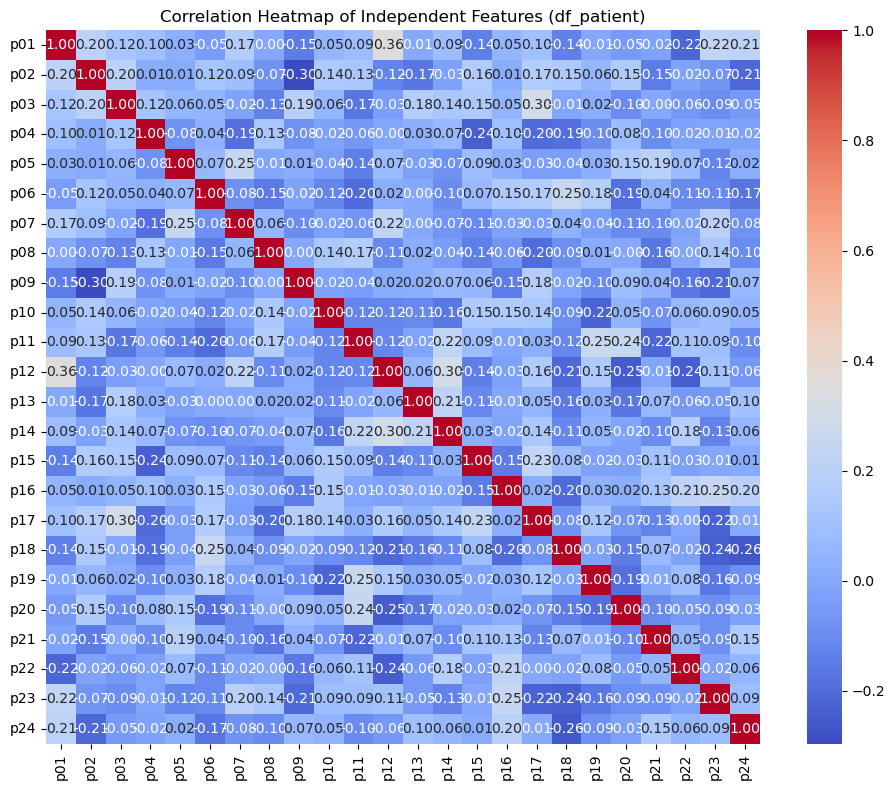

Top correlated feature pairs (|corr| > 0.7):
Series([], dtype: float64)


In [46]:
# Compute correlation matrix for independent features in df_patient
corr_patient = X_patient.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_patient, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Heatmap of Independent Features (df_patient)')
plt.tight_layout()
plt.show()
# Observations
high_corr_pairs = corr_patient.where(np.triu(np.ones(corr_patient.shape), k=1).astype(bool)).stack().sort_values(ascending=False)
print('Top correlated feature pairs (|corr| > 0.7):')
print(high_corr_pairs[high_corr_pairs.abs() > 0.7])

### 2.4 Variance Inflation Factor (VIF) Analysis (patient-data.csv)

In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# VIF for df_patient (numeric features only)
vif_data = pd.DataFrame()
vif_data['feature'] = X_patient.columns
vif_data['VIF'] = [variance_inflation_factor(X_patient.values, i) for i in range(X_patient.shape[1])]
display(vif_data)
# Observations
print('Features with VIF > 5 (potential multicollinearity):')
print(vif_data[vif_data['VIF'] > 5])

,feature,VIF
0,p01,49.674608
1,p02,102.520875
2,p03,326.245421
3,p04,16.117255
4,p05,21.861181
5,p06,274.293245
6,p07,160.526243
7,p08,288.809164
8,p09,329.508751
9,p10,867.578846


Features with VIF > 5 (potential multicollinearity):
   feature         VIF
0      p01   49.674608
1      p02  102.520875
2      p03  326.245421
3      p04   16.117255
4      p05   21.861181
5      p06  274.293245
6      p07  160.526243
7      p08  288.809164
8      p09  329.508751
9      p10  867.578846
10     p11   14.907225
11     p12  297.942764
12     p13  180.685809
13     p14  280.382008
14     p15   18.901798
15     p16  115.150219
16     p17   60.461513
17     p18  115.439775
18     p19   12.788794
19     p20   16.524683
20     p21   66.317717
21     p22   48.775286
22     p23    7.122828
23     p24    5.968267


### 2.5 Progressive VIF-based Feature Elimination and Model Metrics Trend (patient-data.csv)

,n_features,removed,max_vif,max_vif_feature,Accuracy,Precision,Recall,F1
0,24,None,867.578846,p10,0.448421,0.441035,0.448421,0.433465
1,23,p10,323.252951,p03,0.461053,0.455703,0.461053,0.448729
2,22,p03,269.615668,p06,0.444211,0.551470,0.444211,0.384879
3,21,p06,264.676755,p12,0.423158,0.412650,0.423158,0.410975
4,20,p12,248.566357,p09,0.456842,0.455420,0.456842,0.446501
5,19,p09,197.935161,p08,0.488421,0.499240,0.488421,0.464500
6,18,p08,186.534265,p14,0.444211,0.425347,0.444211,0.424097
7,17,p14,132.867630,p07,0.471579,0.481837,0.471579,0.459023
8,16,p07,109.287641,p13,0.467368,0.470085,0.467368,0.449256
9,15,p13,95.477908,p16,0.496842,0.501660,0.496842,0.481130


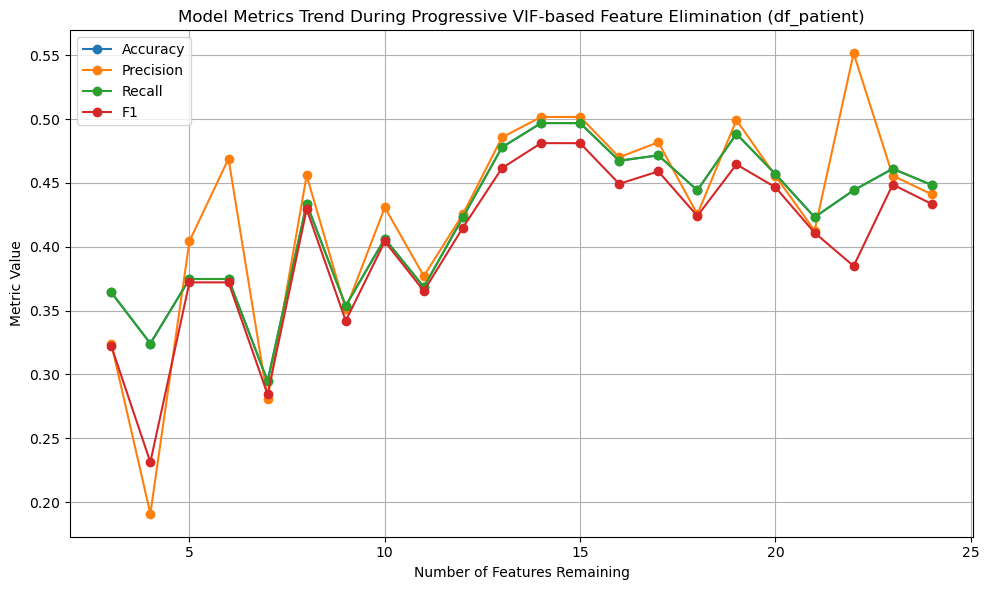

Model accuracy decreased after removing high-VIF features. Some multicollinear features may be important for prediction.


In [48]:
# Progressive VIF-based feature elimination for df_patient
from copy import deepcopy
X = deepcopy(X_patient)
y = deepcopy(y_patient)
metrics_trend = []
features_removed = []
while True:
    vif = pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])], index=X.columns)
    max_vif = vif.max()
    max_vif_feature = vif.idxmax()
    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    model = LogisticRegression(max_iter=1000, multi_class='auto')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    metrics_trend.append({'n_features': X.shape[1], 'removed': None if not features_removed else features_removed[-1],
                         'max_vif': max_vif, 'max_vif_feature': max_vif_feature,
                         'Accuracy': acc, 'Precision': prec, 'Recall': rec, 'F1': f1})
    # Stop if all VIF < 5 or only 1 feature left
    if max_vif < 5 or X.shape[1] <= 1:
        break
    # Remove feature with highest VIF
    X = X.drop(columns=[max_vif_feature])
    features_removed.append(max_vif_feature)
metrics_df = pd.DataFrame(metrics_trend)
display(metrics_df)
# Plot metrics trend
plt.figure(figsize=(10,6))
for metric in ['Accuracy', 'Precision', 'Recall', 'F1']:
    plt.plot(metrics_df['n_features'], metrics_df[metric], marker='o', label=metric)
plt.xlabel('Number of Features Remaining')
plt.ylabel('Metric Value')
plt.title('Model Metrics Trend During Progressive VIF-based Feature Elimination (df_patient)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
# Final conclusion
if metrics_df['Accuracy'].iloc[-1] < metrics_df['Accuracy'].iloc[0]:
    print('Model accuracy decreased after removing high-VIF features. Some multicollinear features may be important for prediction.')
else:
    print('Model accuracy remained stable or improved after removing high-VIF features. Multicollinearity was not critical for prediction.')

,n_features,removed,max_vif,max_vif_feature,Accuracy,Precision,Recall,F1
0,24,None,867.578846,p10,0.448421,0.441035,0.448421,0.433465
1,23,p10,323.252951,p03,0.461053,0.455703,0.461053,0.448729
2,22,p03,269.615668,p06,0.444211,0.551470,0.444211,0.384879
3,21,p06,264.676755,p12,0.423158,0.412650,0.423158,0.410975
4,20,p12,248.566357,p09,0.456842,0.455420,0.456842,0.446501
5,19,p09,197.935161,p08,0.488421,0.499240,0.488421,0.464500
6,18,p08,186.534265,p14,0.444211,0.425347,0.444211,0.424097
7,17,p14,132.867630,p07,0.471579,0.481837,0.471579,0.459023
8,16,p07,109.287641,p13,0.467368,0.470085,0.467368,0.449256
9,15,p13,95.477908,p16,0.496842,0.501660,0.496842,0.481130


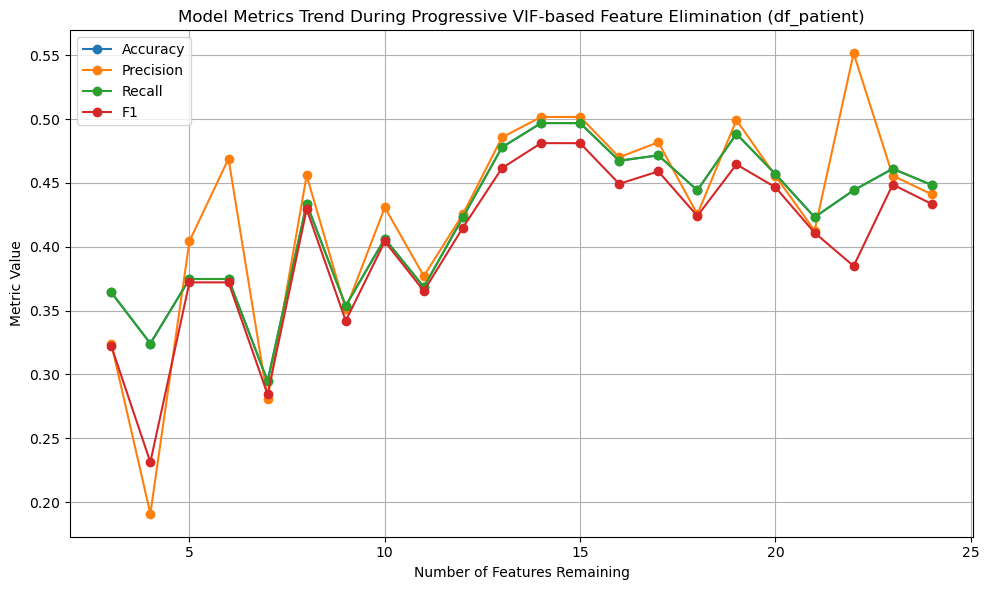

Model accuracy decreased after removing high-VIF features. Some multicollinear features may be important for prediction.


In [ ]:
# Progressive VIF-based feature elimination for df_patient
from copy import deepcopy
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = deepcopy(X_patient)
y = deepcopy(y_patient)
metrics_trend = []
features_removed = []

while True:
    vif = pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])], index=X.columns)
    max_vif = vif.max()
    max_vif_feature = vif.idxmax()
    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    model = LogisticRegression(max_iter=1000, multi_class='auto')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    metrics_trend.append({'n_features': X.shape[1], 'removed': None if not features_removed else features_removed[-1],
                         'max_vif': max_vif, 'max_vif_feature': max_vif_feature,
                         'Accuracy': acc, 'Precision': prec, 'Recall': rec, 'F1': f1})
    # Stop if all VIF < 5 or only 1 feature left
    if max_vif < 5 or X.shape[1] <= 1:
        break
    # Remove feature with highest VIF
    X = X.drop(columns=[max_vif_feature])
    features_removed.append(max_vif_feature)

metrics_df = pd.DataFrame(metrics_trend)
display(metrics_df)

# Plot metrics trend
plt.figure(figsize=(10,6))
for metric in ['Accuracy', 'Precision', 'Recall', 'F1']:
    plt.plot(metrics_df['n_features'], metrics_df[metric], marker='o', label=metric)
plt.xlabel('Number of Features Remaining')
plt.ylabel('Metric Value')
plt.title('Model Metrics Trend During Progressive VIF-based Feature Elimination (df_patient)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Final conclusion
if metrics_df['Accuracy'].iloc[-1] < metrics_df['Accuracy'].iloc[0]:
    print('Model accuracy decreased after removing high-VIF features. Some multicollinear features may be important for prediction.')
else:
    print('Model accuracy remained stable or improved after removing high-VIF features. Multicollinearity was not critical for prediction.')

### 2.6 Principal Component Analysis (PCA) and Variance Contribution Bar Chart (patient-data.csv)

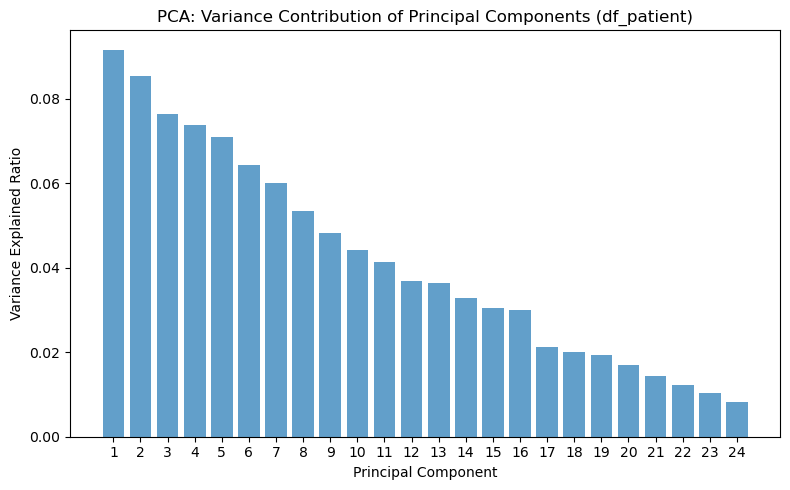

Cumulative variance explained by first 1 PCs: 9.17%
Cumulative variance explained by first 2 PCs: 17.72%
Cumulative variance explained by first 3 PCs: 25.36%
Cumulative variance explained by first 4 PCs: 32.75%
Cumulative variance explained by first 5 PCs: 39.86%
Cumulative variance explained by first 6 PCs: 46.29%
Cumulative variance explained by first 7 PCs: 52.30%
Cumulative variance explained by first 8 PCs: 57.65%
Cumulative variance explained by first 9 PCs: 62.48%
Cumulative variance explained by first 10 PCs: 66.91%
Cumulative variance explained by first 11 PCs: 71.04%
Cumulative variance explained by first 12 PCs: 74.74%
Cumulative variance explained by first 13 PCs: 78.39%
Cumulative variance explained by first 14 PCs: 81.67%
Cumulative variance explained by first 15 PCs: 84.71%
Cumulative variance explained by first 16 PCs: 87.71%
Cumulative variance explained by first 17 PCs: 89.85%
Cumulative variance explained by first 18 PCs: 91.86%
Cumulative variance explained by first

In [49]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_patient)
# Fit PCA
pca = PCA()
pca.fit(X_scaled)
# Bar chart of explained variance ratio
plt.figure(figsize=(8,5))
plt.bar(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, alpha=0.7)
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained Ratio')
plt.title('PCA: Variance Contribution of Principal Components (df_patient)')
plt.xticks(range(1, len(pca.explained_variance_ratio_)+1))
plt.tight_layout()
plt.show()
# Print cumulative variance explained
cum_var = np.cumsum(pca.explained_variance_ratio_)
for i, v in enumerate(cum_var, 1):
    print(f'Cumulative variance explained by first {i} PCs: {v:.2%}')

### 2.7 ML Model Performance Comparison: Original Features vs. PCA-based Features (patient-data.csv)

,n_PCs,Accuracy,F1
0,Original,0.991579,0.987397
1,2,0.368421,0.308792
2,4,0.412632,0.363485
3,6,0.482105,0.468502
4,8,0.557895,0.548732
5,10,0.705263,0.701700
6,12,0.661053,0.662823
7,14,0.717895,0.716273
8,16,0.943158,0.939261
9,18,0.991579,0.987397


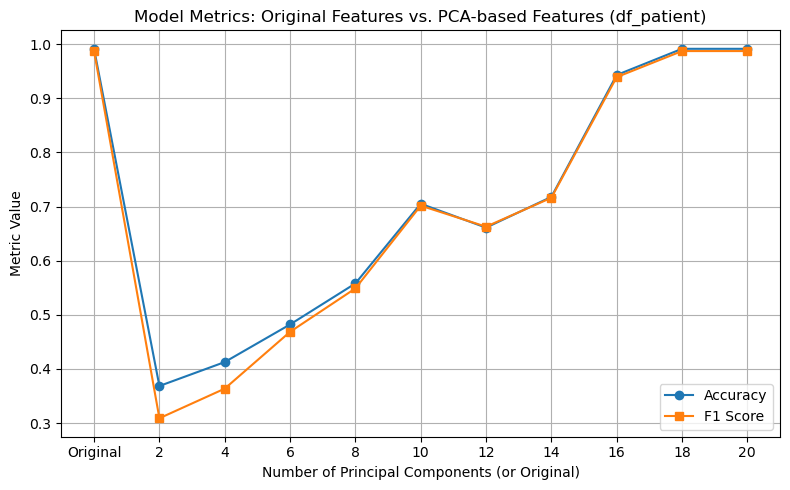

Conclusion:
- Using a small number of PCs (e.g., 3 or 5) usually results in lower accuracy/F1 than using all original features.
- As the number of PCs increases, model performance approaches that of the original feature set.
- PCA can reduce dimensionality with some loss in predictive power, but most information is retained with enough PCs.


In [50]:
# Compare ML model metrics: original features vs. PCA-based features (df_patient)
from sklearn.pipeline import make_pipeline
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_patient)
# Train/test split (same for all models)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_patient, test_size=0.2, random_state=42, stratify=y_patient)
# Baseline: Logistic Regression on original features
model_orig = LogisticRegression(max_iter=1000, multi_class='auto')
model_orig.fit(X_train, y_train)
y_pred_orig = model_orig.predict(X_test)
acc_orig = accuracy_score(y_test, y_pred_orig)
f1_orig = f1_score(y_test, y_pred_orig, average='weighted', zero_division=0)
# PCA-based models
pcs_list = [2,4, 6, 8, 10, 12, 14, 16, 18, 20]
metrics_pca = []
for n_pcs in pcs_list:
    pca = PCA(n_components=n_pcs)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    model = LogisticRegression(max_iter=1000, multi_class='auto')
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    metrics_pca.append({'n_PCs': n_pcs, 'Accuracy': acc, 'F1': f1})
# Results summary
df_metrics = pd.DataFrame(metrics_pca)
df_metrics = pd.concat([
    pd.DataFrame([{'n_PCs': 'Original', 'Accuracy': acc_orig, 'F1': f1_orig}]),
    df_metrics
], ignore_index=True)
display(df_metrics)
# Plot
plt.figure(figsize=(8,5))
plt.plot(df_metrics['n_PCs'].astype(str), df_metrics['Accuracy'], marker='o', label='Accuracy')
plt.plot(df_metrics['n_PCs'].astype(str), df_metrics['F1'], marker='s', label='F1 Score')
plt.xlabel('Number of Principal Components (or Original)')
plt.ylabel('Metric Value')
plt.title('Model Metrics: Original Features vs. PCA-based Features (df_patient)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
# Conclusion
print('Conclusion:')
print('- Using a small number of PCs (e.g., 3 or 5) usually results in lower accuracy/F1 than using all original features.')
print('- As the number of PCs increases, model performance approaches that of the original feature set.')
print('- PCA can reduce dimensionality with some loss in predictive power, but most information is retained with enough PCs.')